In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import statistics
import warnings
warnings.filterwarnings('ignore')

In [50]:
df =pd.read_csv('/content/drive/MyDrive/dataset/archive (3).zip')

In [51]:
df2=df.copy()

In [53]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Bivaraint Analysis

In [54]:
df2.Churn=df2.Churn.map({'No':0,'Yes':1})

In [55]:
df2.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [28]:
#def uniplot(df2,col,title,hue=None):
  #sns.set_style('whitegrid')
 # sns.set_context('talk')
 # temp=pd.Series(data=hue)
  #fig,ax=plt.subplots()
  #width=len(df2[col].unique())+7+4*len(temp.unique())
  #fig.set_size_inches(width,8)
  #plt.xticks(rotation =45)
  #plt.yscale('log')
  #plt.title(title)
  #ax=sns.countplot(data=df2,x=col,order=df2[col].value_counts().index, hue =hue , palette='bright')

male with no partner are likely to churn  compared to female

Text(0.5, 1.0, '  non Churn')

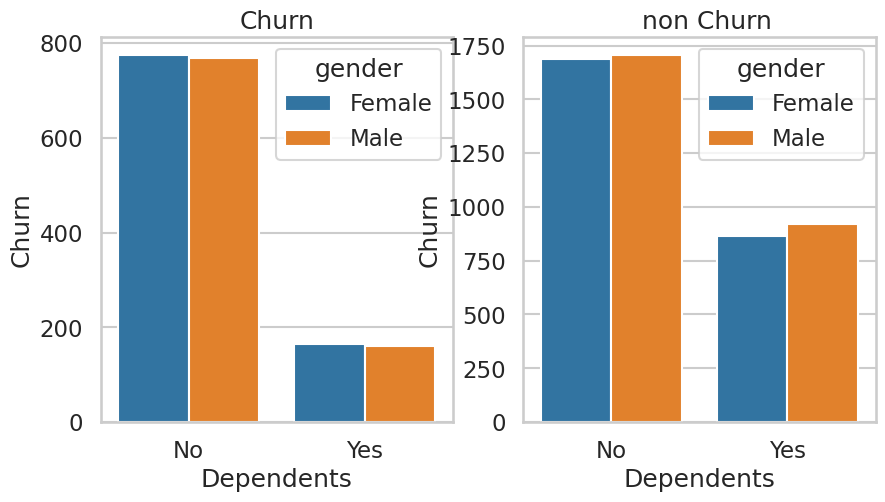

In [82]:
df_final=df2[df2['Churn']==1].groupby(['Dependents','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['Dependents','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(10,5))
sns.barplot(x='Dependents',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='Dependents',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('  non Churn')


Text(0.5, 1.0, 'non Churn')

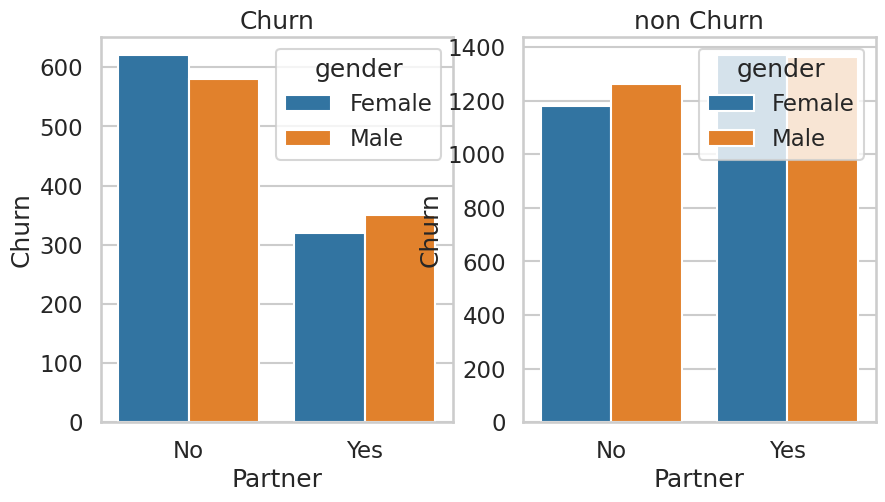

In [83]:
df_final=df2[df2['Churn']==1].groupby(['Partner','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['Partner','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(10,5))
sns.barplot(x='Partner',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='Partner',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

it appear that male  customer without partner a likely to churn  compared to the female customer

Text(0.5, 1.0, 'non Churn')

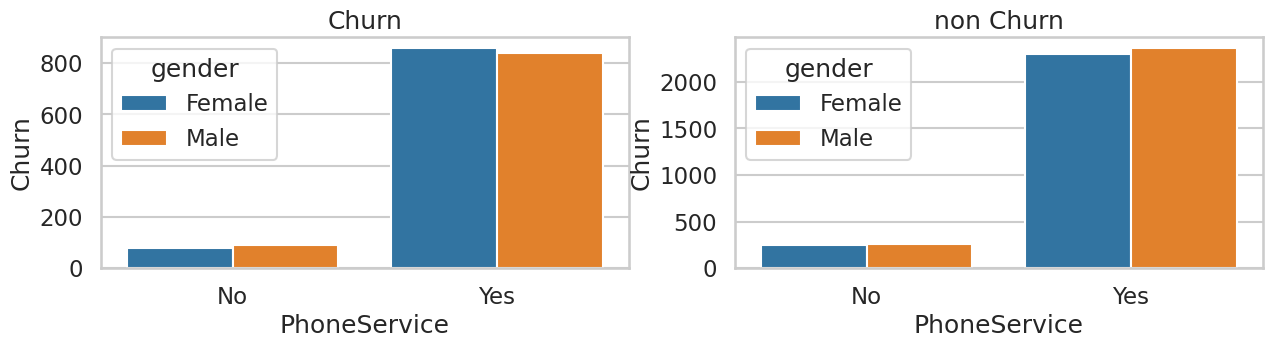

In [87]:
df_final=df2[df2['Churn']==1].groupby(['PhoneService','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['PhoneService','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='PhoneService',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='PhoneService',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

it appear that female customer with  phoneservice are likely to churn  compared to the male customer with phine serviec

Text(0.5, 1.0, 'non Churn')

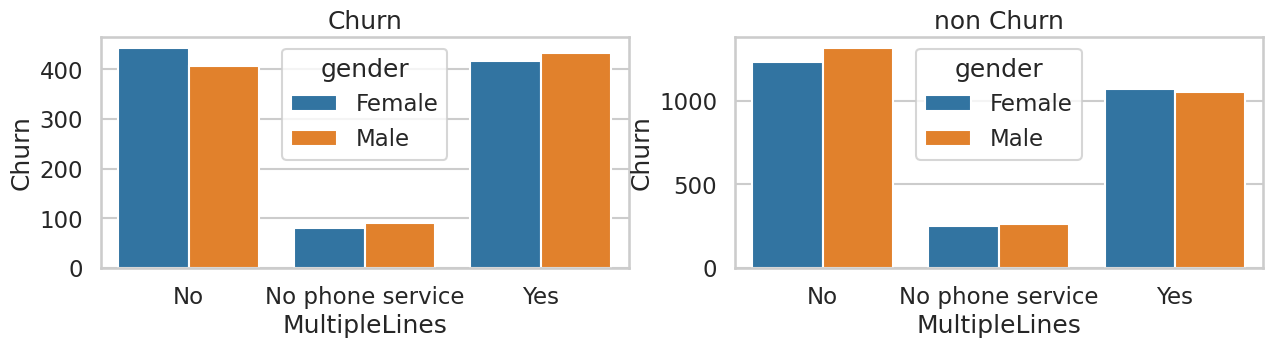

In [88]:
df_final=df2[df2['Churn']==1].groupby(['MultipleLines','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['MultipleLines','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='MultipleLines',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='MultipleLines',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

1.it appear that female with no multiple line  are likely to churn
2.male with multiple line are like to churn too
3.male with no phone service are likely  to churn

Text(0.5, 1.0, 'non Churn')

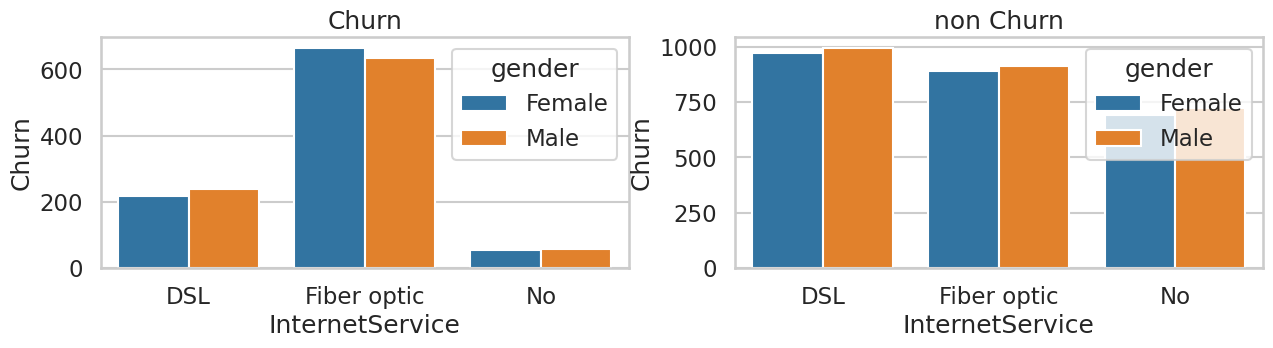

In [89]:
df_final=df2[df2['Churn']==1].groupby(['InternetService','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['InternetService','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='InternetService',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='InternetService',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

Text(0.5, 1.0, 'non Churn')

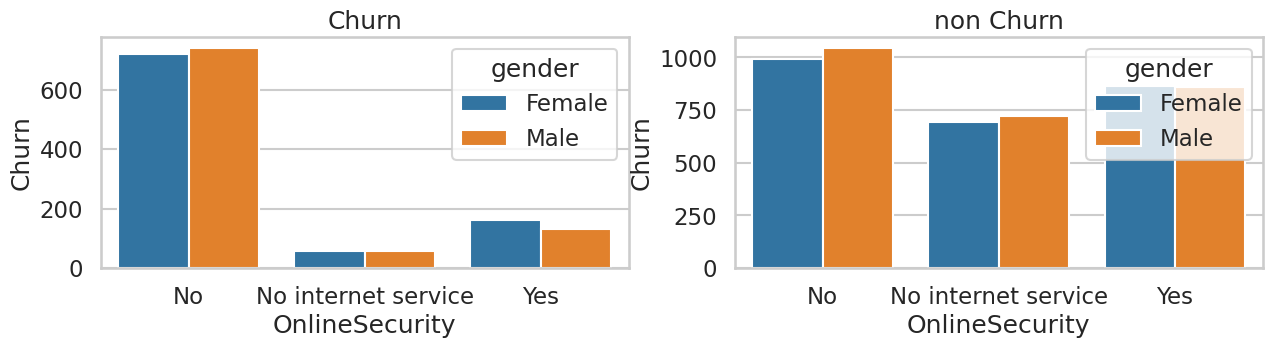

In [90]:
df_final=df2[df2['Churn']==1].groupby(['OnlineSecurity','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['OnlineSecurity','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='OnlineSecurity',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='OnlineSecurity',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

Text(0.5, 1.0, 'non Churn')

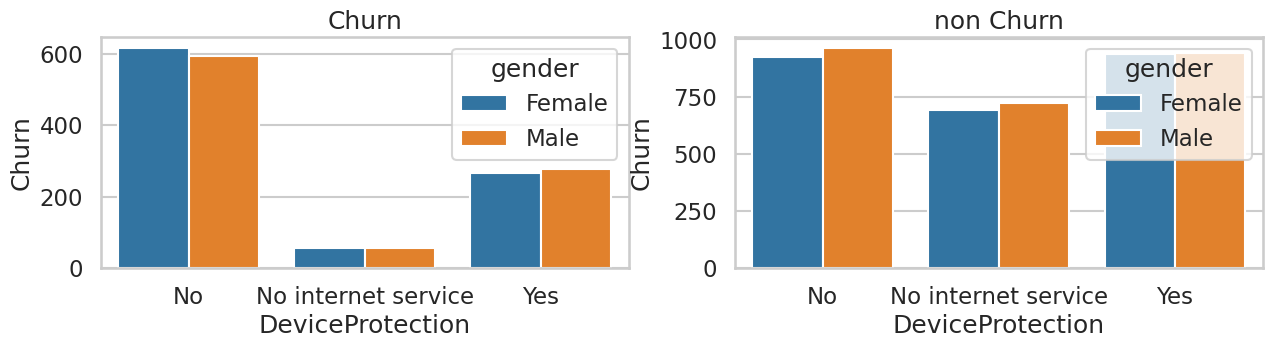

In [94]:
df_final=df2[df2['Churn']==1].groupby(['DeviceProtection','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['DeviceProtection','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='DeviceProtection',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='DeviceProtection',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

Text(0.5, 1.0, 'non Churn')

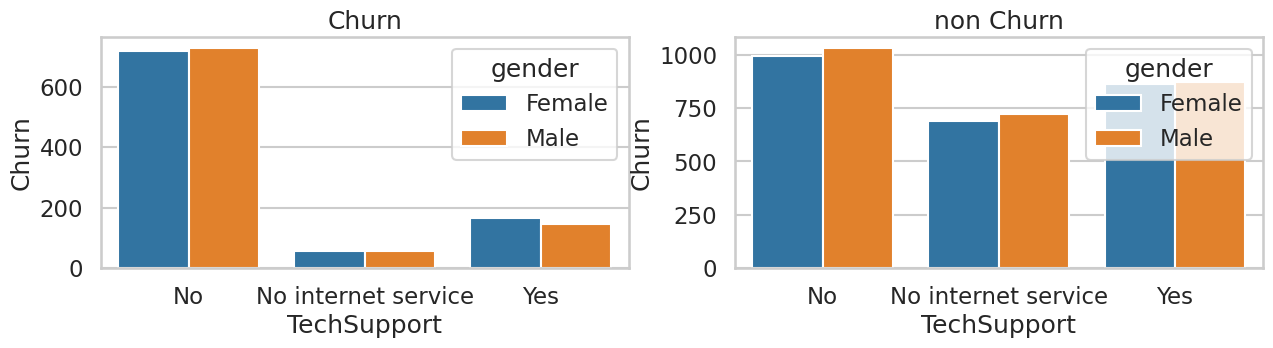

In [95]:
df_final=df2[df2['Churn']==1].groupby(['TechSupport','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['TechSupport','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='TechSupport',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='TechSupport',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

Text(0.5, 1.0, 'non Churn')

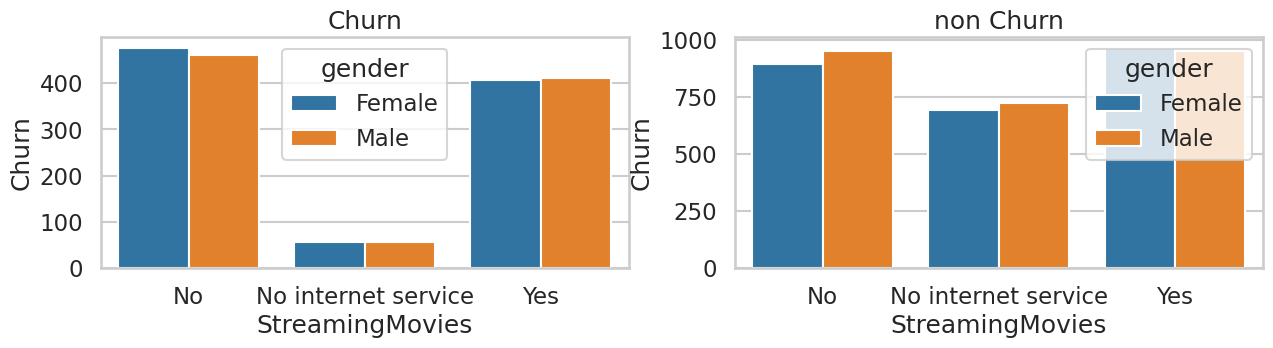

In [99]:
df_final=df2[df2['Churn']==1].groupby(['StreamingMovies','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['StreamingMovies','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(15,3))
sns.barplot(x='StreamingMovies',y='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(x='StreamingMovies',y='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

Text(0.5, 1.0, 'non Churn')

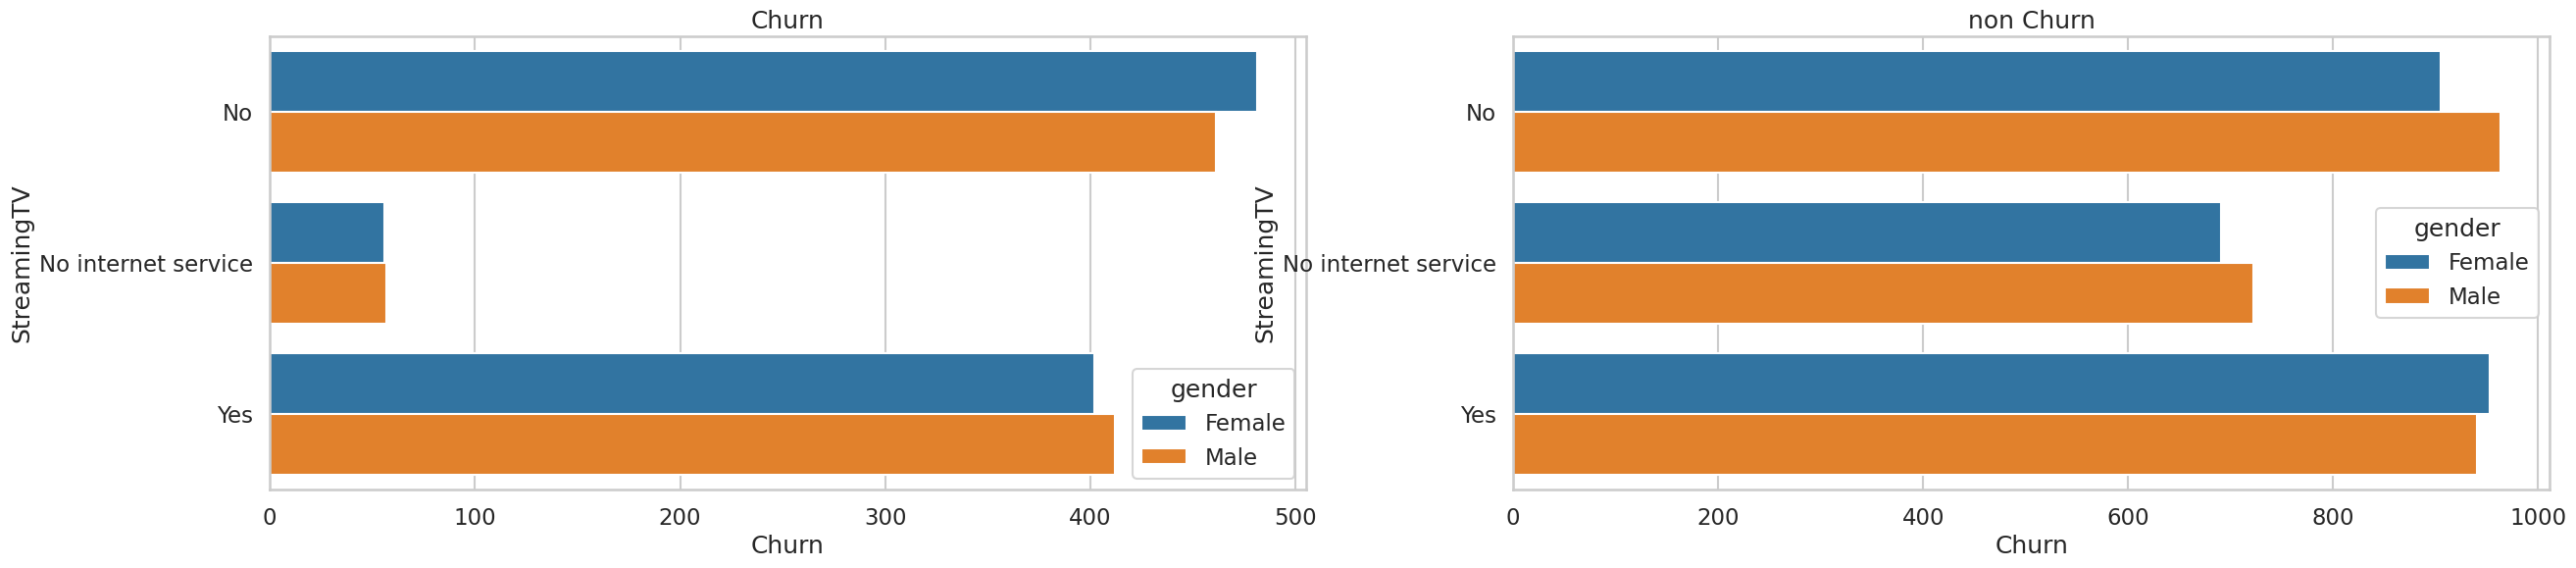

In [124]:
df_final=df2[df2['Churn']==1].groupby(['StreamingTV','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['StreamingTV','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(30,6))
sns.barplot(y='StreamingTV',x='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(y='StreamingTV',x='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

Text(0.5, 1.0, 'non Churn')

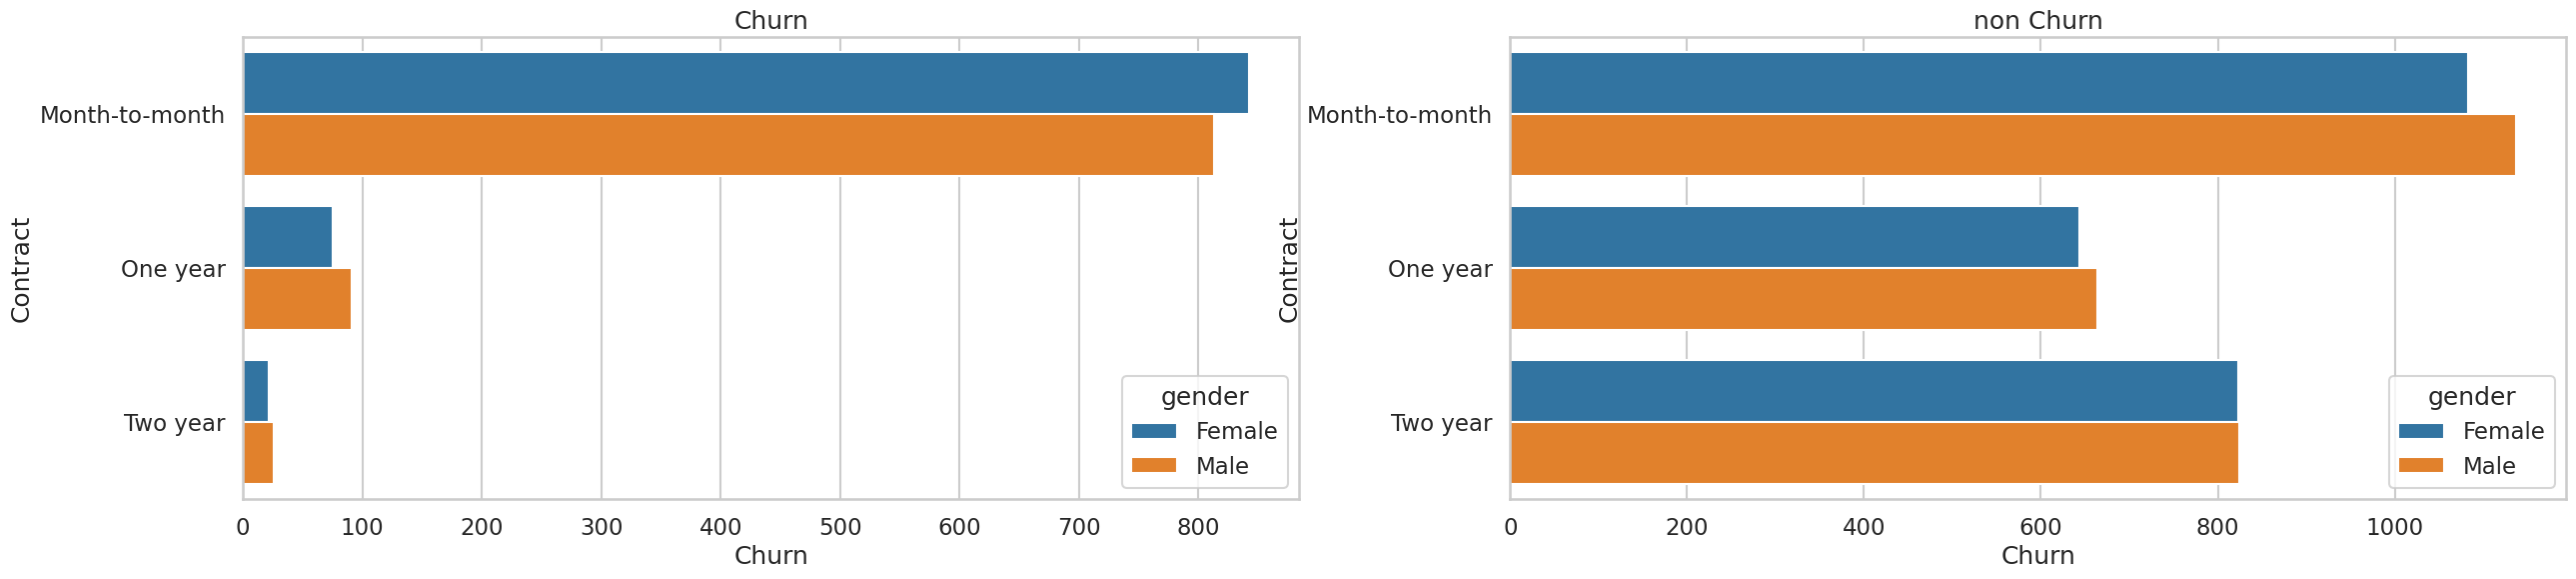

In [123]:
df_final=df2[df2['Churn']==1].groupby(['Contract','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['Contract','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(30,6))
sns.barplot(y='Contract',x='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(y='Contract',x='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

customer with monthly subscrition are more likely to churn..
for customer with monthly subscrition the female are more likely to churn  

Text(0.5, 1.0, 'non Churn')

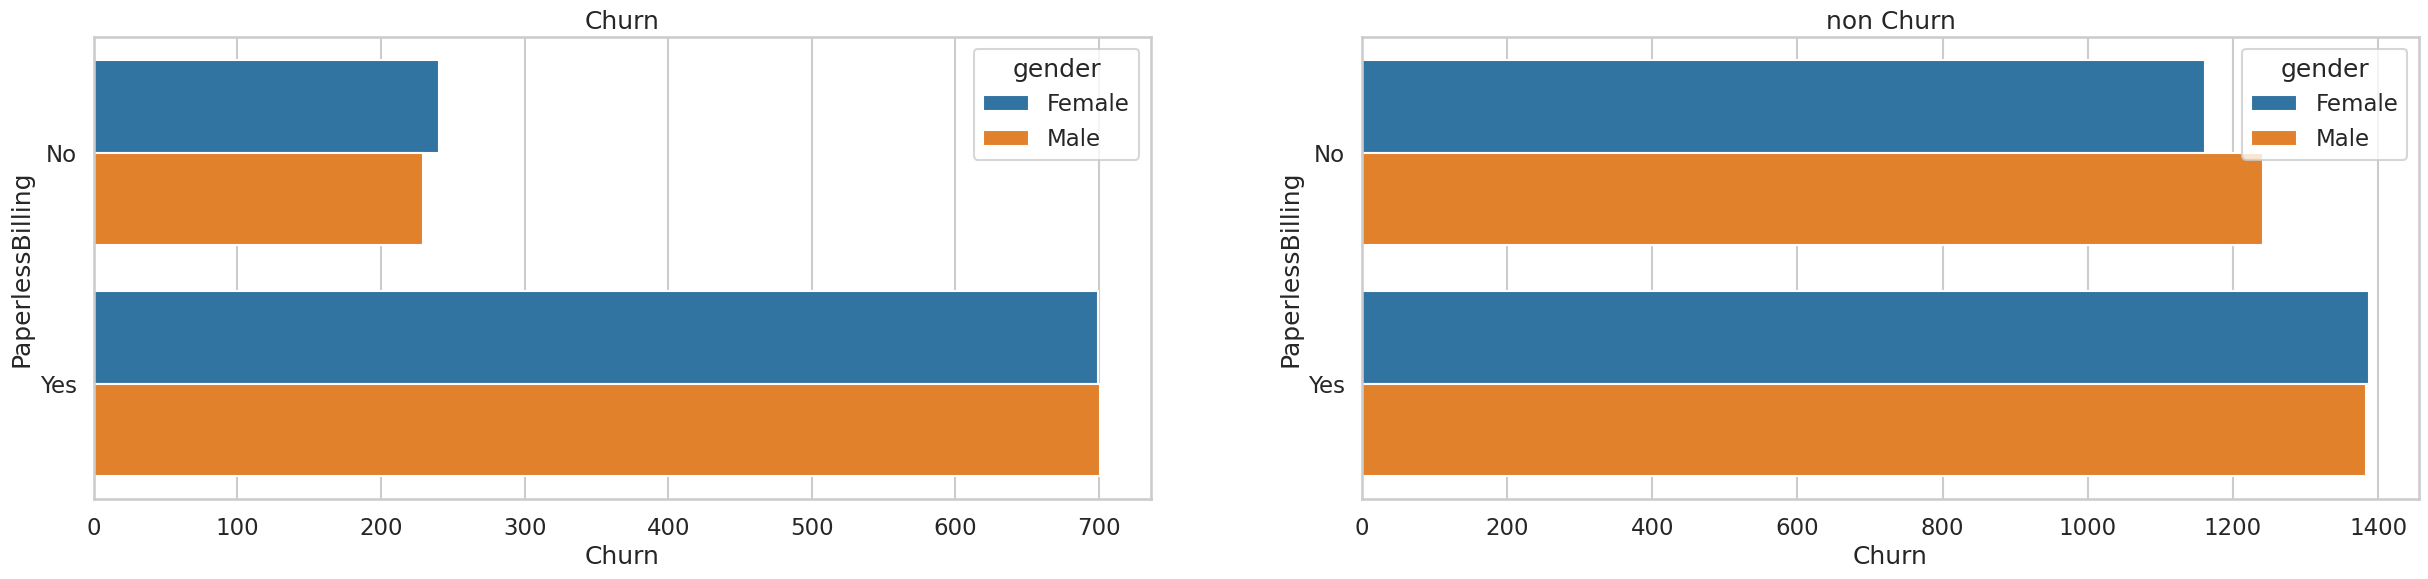

In [121]:
df_final=df2[df2['Churn']==1].groupby(['PaperlessBilling','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['PaperlessBilling','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(30,6))
sns.barplot(y='PaperlessBilling',x='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(y='PaperlessBilling',x='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

it appear the percentahe of both male of female for paperbilling are same and have equal chance of churning

Text(0.5, 1.0, 'non Churn')

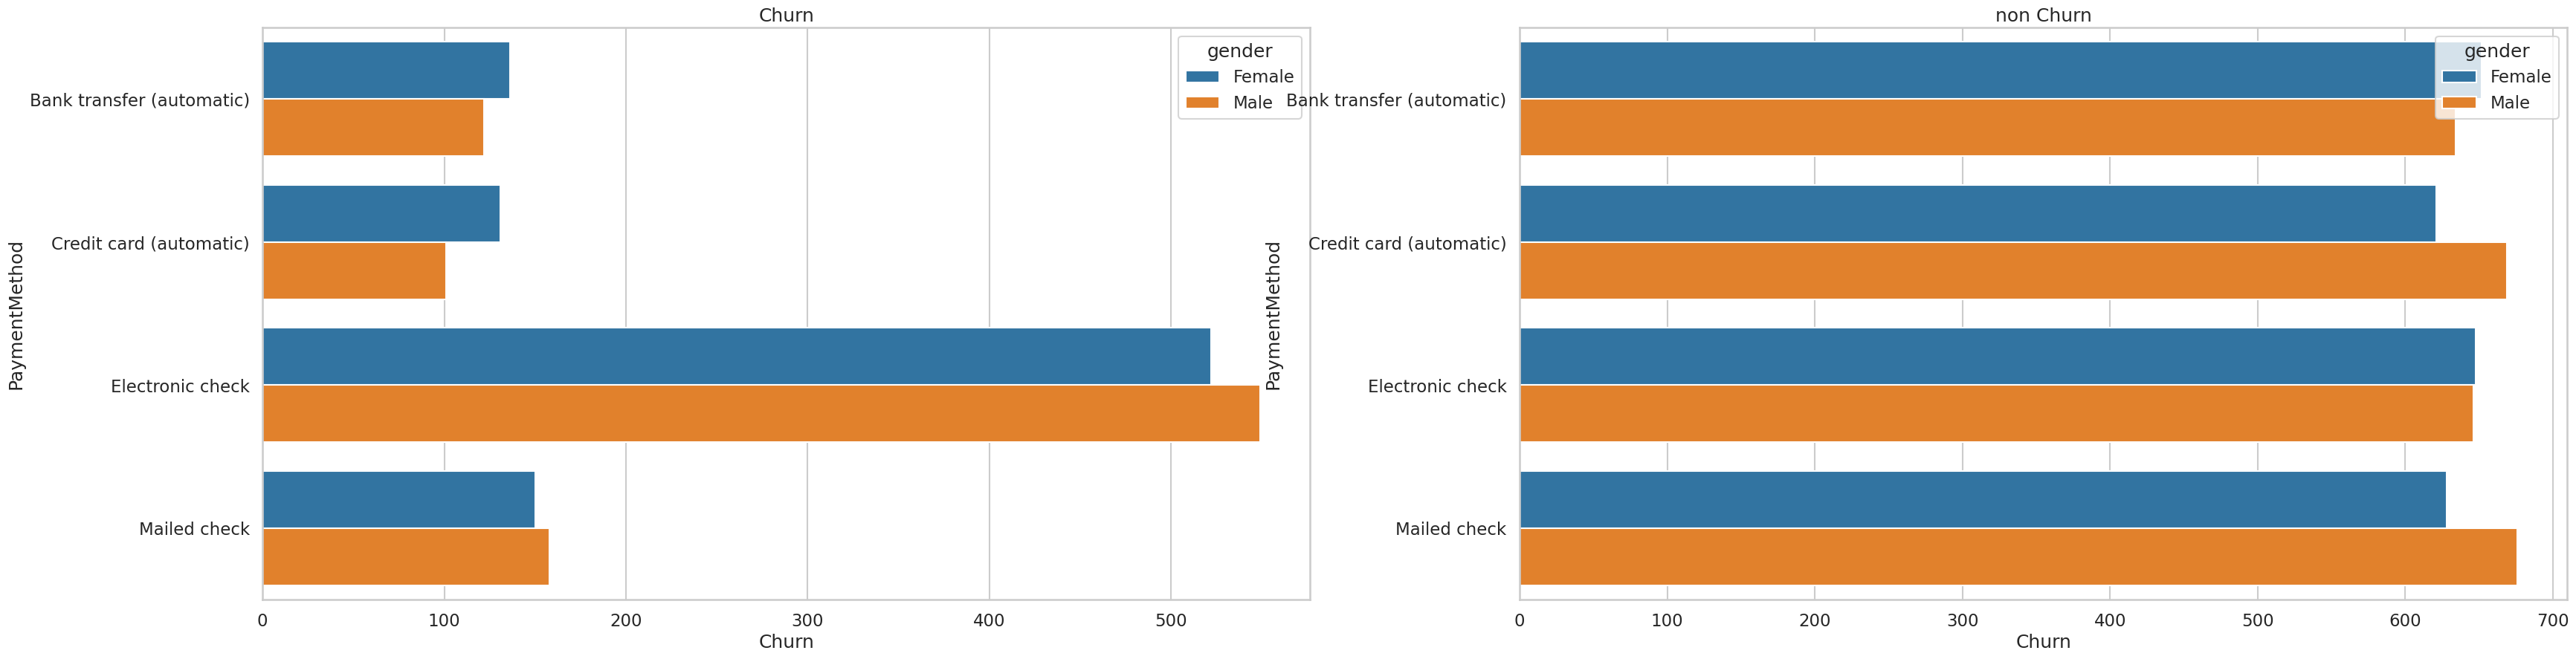

In [118]:
df_final=df2[df2['Churn']==1].groupby(['PaymentMethod','gender']).Churn.count().to_frame().reset_index()
df_final1=df2[df2['Churn']==0].groupby(['PaymentMethod','gender']).Churn.count().to_frame().reset_index()
fig,axs=plt.subplots(1,2, figsize=(40,10))
sns.barplot(y='PaymentMethod',x='Churn', hue ='gender', data=df_final, ax=axs[0])
sns.barplot(y='PaymentMethod',x='Churn', hue ='gender', data=df_final1)
axs[0].set_title('Churn')
axs[1].set_title('non Churn')

it appear that electronic payment method customer  are more likely to churn and the males user of the electric paymnet method are more likely to churn


Our analysis aimed to understand why customers leave and suggest ways to keep them. The churn rate, indicating the percentage of customers who stopped using our services within a set period.
the following observation was draw from the dataset
1. 84% of the customers are senior citizens, while 16% are not. Non-senior citizens are more likely to churn due to their higher percentage of churn.
2. Customers without partners are 33% more likely to churn compared to those with partners, who have a churn rate of 20%.
3. 70% of customers have no dependents, while 30% do. Customers without dependents are more likely to churn.
4. 90% of customers have phone service, while 9% do not. Customers with phone service are more likely to churn.
5. 48% of customers have no multiple lines, 40% have multiple lines, and 9% have no network service. Customers with no multiple lines are more likely to churn compared to those with alternative lines.
6. Customers with no online service are more likely to churn.
7. Customers with no device protection are more likely to churn, followed by those with device protection.
8. Customers with no tech support are likely to churn, with a percentage of 41% compared to those with tech support.
9. Customers with no streaming are likely to churn compared to those with no internet service.
10. Customers with no streaming movies are likely to churn, with a 33% chance of churning, followed by those with streaming movies.
12. Customers with one-month subscriptions are more likely to churn, followed by those with one-year contracts.
13. Customers who made payments through electronic checks are more likely to churn, followed by those who made payments through checks.
14. Tenure elongation from 0-10 is associated with a higher churn rate.
15. Monthly charges and total charges are positively correlated, indicating that an increase in monthly charges leads to an increase in total charges.
16. The churn rate is high when the monthly charges are very high, while the non-churn rate is high when the monthly charges are very low. Thus, higher monthly charges are associated with a higher chance of customer churn.